# Assignment 6 - Kanak Agarwal

## Problem 2

In [78]:
import numpy as np

# Stopping criterion
def relative_change(x_new, x_old):
    return np.linalg.norm(x_new - x_old) / max(1.0, np.linalg.norm(x_old))

# Function: f(x, y) = (x-3)^2 + (y-2)^2
def f_a(v):
    x, y = v
    return (x - 3)**2 + (y - 2)**2

def grad_a(v):
    x, y = v
    return np.array([2*(x - 3), 2*(y - 2)])

def hess_a(v):
    return 2*np.eye(2)

# Function: f(x, y, z) = exp(-(x-5)^2 - (y-8)^2 - 2*(z-3)^2)
def f_b(v):
    x, y, z = v
    return np.exp(-((x - 5)**2 + (y - 8)**2 + 2*(z - 3)**2))

def grad_b(v):
    x, y, z = v
    c = f_b(v)
    return c * np.array([-2*(x - 5), -2*(y - 8), -4*(z - 3)])

def hess_b(v):
    x, y, z = v
    c = f_b(v)
    H = np.array([[-2, 0, 0], [0, -2, 0], [0, 0, -4]]) * c
    g = grad_b(v)
    return H + np.outer(g, np.array([(x - 5), (y - 8), 2*(z - 3)]))

# Function: f(x, y) = ln(x^2 + 2xy + 3y^2 - 4y + 3)
def f_c(v):
    x, y = v
    Q = x**2 + 2*x*y + 3*y**2 - 4*y + 3
    return np.log(Q)

def grad_c(v):
    x, y = v
    Q = x**2 + 2*x*y + 3*y**2 - 4*y + 3
    return (1/Q) * np.array([2*x + 2*y, 2*x + 6*y - 4])

def hess_c(v):
    x, y = v
    Q = x**2 + 2*x*y + 3*y**2 - 4*y + 3
    gradQ = np.array([2*x + 2*y, 2*x + 6*y - 4])
    Hq = np.array([[2, 2], [2, 6]])
    return (1/Q)*Hq - (1/Q**2)*np.outer(gradQ, gradQ)

def steepest_method(f, grad, x0, ascent=False, lr=0.1, tol=0.01, max_iter=1000):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    for i in range(max_iter):
        g = grad(x)
        if ascent:
            x_new = x + lr * g
        else:
            x_new = x - lr * g
        path.append(x_new.copy())
        if relative_change(x_new, x) < tol:
            break
        x = x_new
    return x, f(x), len(path), np.array(path)

def newton_method(f, grad, hess, x0, ascent=False, tol=0.01, max_iter=100):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    for _ in range(max_iter):
        g = grad(x)
        H = hess(x)
        try:
            step = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            step = np.linalg.lstsq(H, g, rcond=None)[0]
        if ascent:
            x_new = x + step
        else:
            x_new = x - step
        path.append(x_new.copy())
        if relative_change(x_new, x) < tol:
            break
        x = x_new
    return x, f(x), len(path), np.array(path)

x0_a = [1, 1]
res_a_sd = steepest_method(f_a, grad_a, x0_a, ascent=False, lr=0.25)
res_a_newton = newton_method(f_a, grad_a, hess_a, x0_a, ascent=False)

x0_b = [0, 0, 0]
res_b_sd = steepest_method(f_b, grad_b, x0_b, ascent=True, lr=0.01)
res_b_newton = newton_method(f_b, grad_b, hess_b, x0_b, ascent=True)

x0_c = [0, 0]
res_c_sd = steepest_method(f_c, grad_c, x0_c, ascent=False, lr=0.05)
res_c_newton = newton_method(f_c, grad_c, hess_c, x0_c, ascent=False)

# Results
print("Problem (a): Quadratic bowl")
print("Steepest descent:", res_a_sd[0], " f =", res_a_sd[1], " Iter =", res_a_sd[2])
print("Newton's method :", res_a_newton[0], " f =", res_a_newton[1], " Iter =", res_a_newton[2])
print()

print("Problem (b): Gaussian peak")
print("Steepest ascent:", res_b_sd[0], " f =", res_b_sd[1], " Iter =", res_b_sd[2])
print("Newton's method:", res_b_newton[0], " f =", res_b_newton[1], " Iter =", res_b_newton[2])
print()

print("Problem (c): Log-quadratic valley")
print("Steepest descent:", res_c_sd[0], " f =", res_c_sd[1], " Iter =", res_c_sd[2])
print("Newton's method :", res_c_newton[0], " f =", res_c_newton[1], " Iter =", res_c_newton[2])


Problem (a): Quadratic bowl
Steepest descent: [2.9375  1.96875]  f = 0.0048828125  Iter = 7
Newton's method : [3. 2.]  f = 0.0  Iter = 3

Problem (b): Gaussian peak
Steepest ascent: [0. 0. 0.]  f = 3.392270193026015e-47  Iter = 2
Newton's method: [-2.9503714  -4.72059423 -1.77022284]  f = 3.231887011425879e-118  Iter = 84

Problem (c): Log-quadratic valley
Steepest descent: [-0.81135203  0.92185695]  f = 0.024130512032747787  Iter = 43
Newton's method : [ 2.64277016e+30 -2.64277016e+30]  f = 140.79190810223392  Iter = 101


## Problem 3

In [ ]:
import math

def f(x):
    return x**2 * math.exp(2*x)

I_exact = math.exp(6) * (9/2 - 3/2 + 1/4) - math.exp(0) * (0 - 0 + 1/4)

def trapezoidal(a,b):
    return (b-a)/2.0 * (f(a) + f(b))

I_T = trapezoidal(0,3)
print("Trapezoidal Rule Approximation: ", I_T)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_T) / abs(I_exact))
print()

def trapezoidal_composite(a,b,n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

I_T_composite = trapezoidal_composite(0,3,2)
print("Composite Trapezoidal Rule Approximation (n=2): ", I_T_composite)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_T_composite) / abs(I_exact))
print()

I_T_composite = trapezoidal_composite(0,3,4)
print("Composite Trapezoidal Rule Approximation (n=4): ", I_T_composite)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_T_composite) / abs(I_exact))
print()

def simpsons_13(a,b):
    return (b - a) / 6.0 * (f(a) + 4.0 * f((a + b) / 2.0) + f(b))

I_S = simpsons_13(0,3)
print("Simpson's Rule Approximation: ", I_S)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_S) / abs(I_exact))
print()

def simpsons_composite(a,b,n):
    if n % 2 == 1:
        n += 1  # Make n even
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        integral += 2 * f(a + i * h)
    integral *= h / 3
    return integral

I_S_composite = simpsons_composite(0,3,4)
print("Composite Simpson's Rule Approximation (n=4): ", I_S_composite)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_S_composite) / abs(I_exact))

def simpsons_38(a,b):
    return (3 * (b - a) / 8.0) * (f(a) + 3.0 * f(a + (b - a) / 3.0) + 3.0 * f(a + 2 * (b - a) / 3.0) + f(b))

I_S38 = simpsons_38(0,3)
print("\nSimpson's 3/8 Rule Approximation: ", I_S38)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_S38) / abs(I_exact))
print()

def simpsons_38_composite(a,b,n):
    if n % 3 != 0:
        n += 3 - (n % 3)  # Make n a multiple of 3
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n, 3):
        integral += 3 * f(a + i * h)
    for i in range(2, n, 3):
        integral += 3 * f(a + i * h)
    for i in range(3, n-2, 3):
        integral += 2 * f(a + i * h)
    integral *= (3 * h / 8)
    return integral

I_S38_composite = simpsons_38_composite(0,3,5)
print("Composite Simpson's 3/8 Rule Approximation (n=5): ", I_S38_composite)
print("Exact Integral Value: ", I_exact)
print("Relative Error: ", abs(I_exact - I_S38_composite) / abs(I_exact))

Trapezoidal Rule Approximation:  5446.288712151924
Exact Integral Value:  1310.893578851389
Relative Error:  3.154638332216096

Composite Trapezoidal Rule Approximation (n=2):  2790.9330431917206
Exact Integral Value:  1310.893578851389
Relative Error:  1.1290309817804958

Composite Trapezoidal Rule Approximation (n=4):  1739.1410295790777
Exact Integral Value:  1310.893578851389
Relative Error:  0.32668361309918154

Simpson's Rule Approximation:  1905.8144868716524
Exact Integral Value:  1310.893578851389
Relative Error:  0.4538285316352955

Composite Simpson's Rule Approximation (n=4):  1388.543691708197
Exact Integral Value:  1310.893578851389
Relative Error:  0.059234490205410356

Simpson's 3/8 Rule Approximation:  4846.729623895281
Exact Integral Value:  1310.893578851389
Relative Error:  2.6972716184497663

Composite Simpson's 3/8 Rule Approximation (n=5):  1346.882713280276
Exact Integral Value:  1310.893578851389
Relative Error:  0.0274538948161


## Problem 4

In [ ]:
import numpy as np, pandas as pd

# Times in minutes since 7:30
times_hr = ["7:30","7:45","8:00","8:15","8:45","9:15"]
times_min = np.array([0,15,30,45,75,105], dtype=float)  # minutes since 7:30
counts_per_4min = np.array([18,24,26,20,18,9], dtype=float) # Given counts per 4 minutes at sample times
rate_per_min = counts_per_4min / 4.0 # Convert to rate per minute

df = pd.DataFrame({
    "Time": times_hr,
    "t_min_since_7_30": times_min,
    "counts_per_4min": counts_per_4min,
    "rate_per_minute": rate_per_min
})

# Composite trapezoidal with unequal spacing
total_cars = 0.0
terms = []
for i in range(len(times_min)-1):
    h = times_min[i+1] - times_min[i]  # minutes
    area = 0.5 * (rate_per_min[i] + rate_per_min[i+1]) * h
    total_cars += area
    terms.append((times_hr[i]+"-"+times_hr[i+1], h, rate_per_min[i], rate_per_min[i+1], area))

avg_rate_per_min = total_cars / (times_min[-1] - times_min[0])
pd.DataFrame(terms, columns=["Interval","Duration_min","rate_start","rate_end","cars_in_interval"])


,Interval,Duration_min,rate_start,rate_end,cars_in_interval
0,7:30-7:45,15.0,4.5,6.00,78.75
1,7:45-8:00,15.0,6.0,6.50,93.75
2,8:00-8:15,15.0,6.5,5.00,86.25
3,8:15-8:45,30.0,5.0,4.50,142.50
4,8:45-9:15,30.0,4.5,2.25,101.25


## Problem 5

In [ ]:
import math

def integrand(x):
    return math.exp(-x*x)

erf_exact = 0.966105

scale = math.sqrt(2.0 / math.pi)
scale_2 = 2.0 / math.sqrt(math.pi) # There seems to be a typo in the question, using the correct scale

def romberg_integration(a,b,levels):
    R = np.zeros((levels, levels))
    for k in range(levels):
        n = 2**k
        h = (b - a) / n
        integral = 0.5 * (integrand(a) + integrand(b))
        for i in range(1, n):
            integral += integrand(a + i * h)
        integral *= h
        R[k,0] = integral
        for j in range(1, k+1):
            R[k,j] = R[k,j-1] + (R[k,j-1] - R[k-1,j-1]) / (4**j - 1)
    return R[levels-1, levels-1]

I_romberg = romberg_integration(0,1.5,4) * scale
print("Romberg Integration Approximation: ", I_romberg)
print("Exact Integral Value: ", erf_exact)
print("Relative Error: ", abs(erf_exact - I_romberg) / abs(erf_exact))
print()

def gauss_point_quadrature(a, b):
    points = [-1/math.sqrt(3), 1/math.sqrt(3)]
    weights = [1.0, 1.0]
    integral = 0.0
    for i in range(2):
        x_i = 0.5 * (b - a) * points[i] + 0.5 * (a + b)
        integral += weights[i] * integrand(x_i)
    integral *= 0.5 * (b - a)
    return integral

I_gauss2 = gauss_point_quadrature(0,1.5) * scale
print("2-Point Gauss Quadrature Approximation: ", I_gauss2)
print("Exact Integral Value: ", erf_exact)
print("Relative Error: ", abs(erf_exact - I_gauss2) / abs(erf_exact))
print()

I_romberg = romberg_integration(0,1.5,4) * scale_2
print("Romberg Integration Approximation: ", I_romberg)
print("Exact Integral Value: ", erf_exact)
print("Relative Error: ", abs(erf_exact - I_romberg) / abs(erf_exact))
print()

I_gauss2 = gauss_point_quadrature(0,1.5) * scale_2
print("2-Point Gauss Quadrature Approximation: ", I_gauss2)
print("Exact Integral Value: ", erf_exact)
print("Relative Error: ", abs(erf_exact - I_gauss2) / abs(erf_exact))
print()

Romberg Integration Approximation:  0.6831337632235525
Exact Integral Value:  0.966105
Relative Error:  0.29289905007887085

2-Point Gauss Quadrature Approximation:  0.6888444217517464
Exact Integral Value:  0.966105
Relative Error:  0.28698803778911564

Romberg Integration Approximation:  0.9660970328657184
Exact Integral Value:  0.966105
Relative Error:  8.246654640684995e-06

2-Point Gauss Quadrature Approximation:  0.974173123606372
Exact Integral Value:  0.966105
Relative Error:  0.00835118709288534



## Problem 7

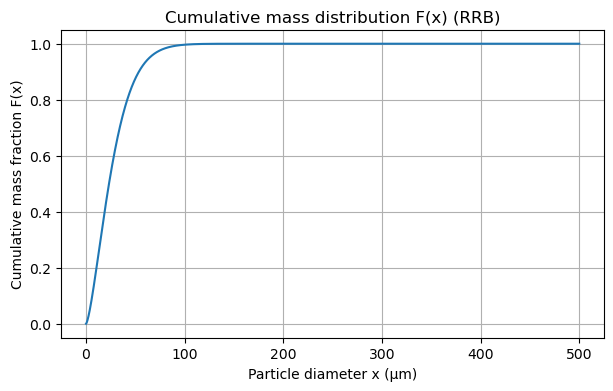

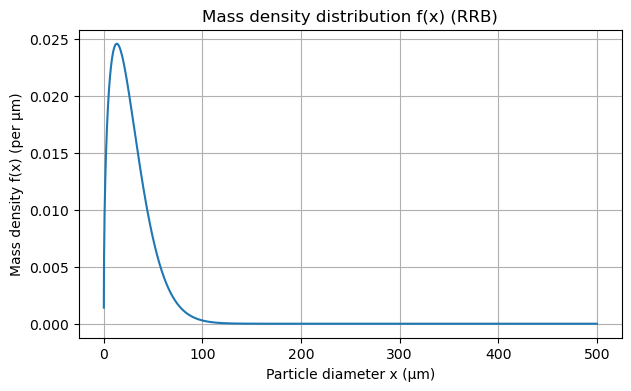

In [49]:
import numpy as np, math
import matplotlib.pyplot as plt

xprime_um = 30.0        # x' in micrometers
nprime = 1.44           # shape
rho = 1.0               # g/cm^3
dmin_um = 1.0           # micrometers

def um_to_cm(x):
    return x * 1e-4

def cm_to_um(x):
    return x * 1e4

# Functions (x in micrometers)
def F_x(x):
    return 1.0 - np.exp(- (x / xprime_um)**nprime)

def f_x(x):
    # f(x) = n'/x' * (x/x')^{n'-1} * exp(-(x/x')^{n'})
    return (nprime / xprime_um) * (x / xprime_um)**(nprime - 1.0) * np.exp(- (x / xprime_um)**nprime)

# Mode x_mode = x' * ((n'-1)/n')^{1/n'}
if nprime > 1.0:
    x_mode_um = xprime_um * ((nprime - 1.0) / nprime)**(1.0 / nprime)
else:
    x_mode_um = None

x_vals = np.linspace(0.01, 500.0, 2000)  # micrometers from 0.01 to 500 um
F_vals = F_x(x_vals)
f_vals = f_x(x_vals)

# F(x)
plt.figure(figsize=(7,4))
plt.plot(x_vals, F_vals)
plt.title("Cumulative mass distribution F(x) (RRB)")
plt.xlabel("Particle diameter x (µm)")
plt.ylabel("Cumulative mass fraction F(x)")
plt.grid(True)
plt.show()

# f(x)
plt.figure(figsize=(7,4))
plt.plot(x_vals, f_vals)
plt.title("Mass density distribution f(x) (RRB)")
plt.xlabel("Particle diameter x (µm)")
plt.ylabel("Mass density f(x) (per µm)")
plt.grid(True)
plt.show()

In [48]:
dmin = dmin_um
x_max = 1e5 # micrometers

def composite_simpson(y, x):
    n = len(x) - 1
    if n % 2 == 1:
        x = x[:-1]; y = y[:-1]; n = len(x)-1
    h = (x[-1] - x[0]) / n
    S = y[0] + y[-1] + 4.0 * np.sum(y[1:-1:2]) + 2.0 * np.sum(y[2:-1:2])
    return S * h / 3.0

x_int = np.concatenate([np.linspace(dmin, 1000, 2000), np.logspace(np.log10(1000), np.log10(x_max), 2000)])
y_int = f_x(x_int) * (1e4 / x_int)  # Convert f(x) from per um to per cm
integral_val = composite_simpson(y_int, x_int)

Sm = (6.0 / rho) * integral_val # cm^2/g

print("Mass specific surface area Sm (cm^2/g): ", Sm)


Mass specific surface area Sm (cm^2/g):  220025.01208129118


## Problem 8

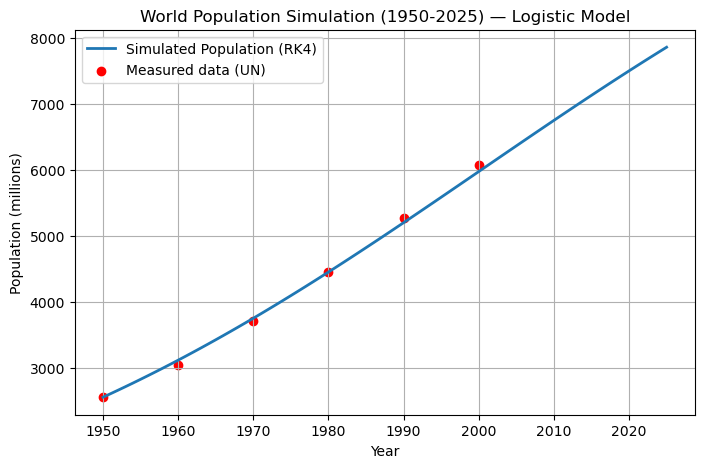

In [62]:
import numpy as np
import matplotlib.pyplot as plt

kgm = 0.026     # /yr
pmax = 12000.0  # million
p0 = 2555.0     # million in 1950
t0 = 1950
t_end = 2025

# Time step for numerical integration (1 yr resolution)
h = 1.0
t_vals = np.arange(t0, t_end + h, h)

# ODE: dp/dt = kgm * (1 - p/pmax) * p
def dpdt(p):
    return kgm * (1.0 - p / pmax) * p

# RK4
p_vals = [p0]
for i in range(1, len(t_vals)):
    p = p_vals[-1]
    k1 = dpdt(p)
    k2 = dpdt(p + 0.5*h*k1)
    k3 = dpdt(p + 0.5*h*k2)
    k4 = dpdt(p + h*k3)
    p_next = p + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    p_vals.append(p_next)

p_vals = np.array(p_vals)

# UN Data
data_years = np.array([1950, 1960, 1970, 1980, 1990, 2000])
data_pop = np.array([2555, 3040, 3708, 4454, 5276, 6079])

# Simulation prediction for 2025
p_2025_pred = p_vals[-1]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t_vals, p_vals, label='Simulated Population (RK4)', lw=2)
plt.scatter(data_years, data_pop, color='red', label='Measured data (UN)')
plt.title("World Population Simulation (1950-2025) — Logistic Model")
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend()
plt.grid(True)
plt.show()

## Problem 9

Time when infected falls below 10:  0.1  days
Time when infected falls below 10 (with reinfection):  0.1  days


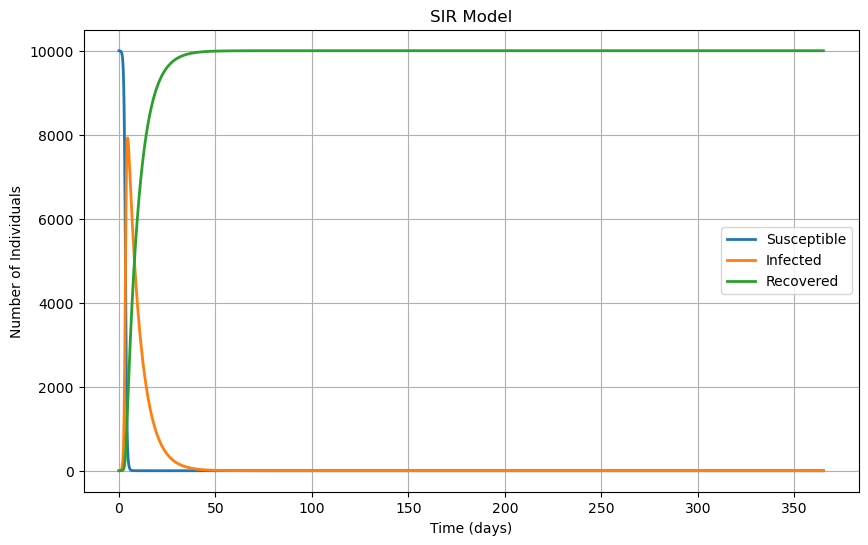

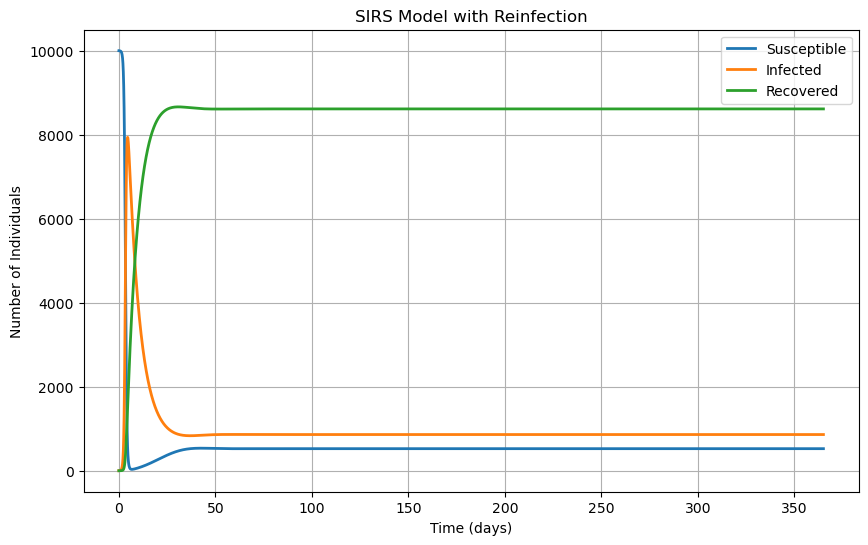

In [ ]:
import numpy as np, math, matplotlib.pyplot as plt

# Initial Conditions
N = 10000.0            # total population
S0 = 9999.0
I0 = 1.0
R0 = 0.0

# Rates
a_per_week = 0.002                      # per person per week
a = a_per_week / 7.0                    # per person per day
r = 0.15                                # per day recovery rate

def simulate_sir(a, r, S0, I0, R0, t_max=365.0, dt=0.1):
    t = np.arange(0.0, t_max+dt, dt)
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t)-1):
        # RK4 step
        p = lambda S,I,R: np.array([ -a*S*I, a*S*I - r*I, r*I ])
        y = np.array([S[n], I[n], R[n]])
        k1 = p(*y)
        k2 = p(*(y + 0.5*dt*k1))
        k3 = p(*(y + 0.5*dt*k2))
        k4 = p(*(y + dt*k3))
        y_next = y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        y_next = np.maximum(y_next, 0.0) # ensure non-negativity and conservation
        S[n+1], I[n+1], R[n+1] = y_next
    return t, S, I, R

t_a, S_a, I_a, R_a = simulate_sir(a, r, S0, I0, R0, t_max=365.0, dt=0.1)

# time when infected falls below 10 after epidemic has started (I>1)
idx_after_peak = np.where(I_a < 10.0)[0]
t_below_10 = None
if len(idx_after_peak)>0: # choose first time index where I<10 and time>0
    for idx in idx_after_peak:
        if t_a[idx] > 0.0:
            t_below_10 = t_a[idx]
            break

print("Time when infected falls below 10: ", t_below_10, " days")

peak_I = I_a.max()
t_peak = t_a[I_a.argmax()]

rho = 0.015  # per day
def simulate_sirs_reinfection(a, r, rho, S0, I0, R0, t_max=365.0, dt=0.1):
    t = np.arange(0.0, t_max+dt, dt)
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t)-1):
        def p_val(S,I,R):
            return np.array([ -a*S*I + rho*R, a*S*I - r*I, r*I - rho*R ])
        y = np.array([S[n], I[n], R[n]])
        k1 = p_val(*y)
        k2 = p_val(*(y + 0.5*dt*k1))
        k3 = p_val(*(y + 0.5*dt*k2))
        k4 = p_val(*(y + dt*k3))
        y_next = y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        y_next = np.maximum(y_next, 0.0)
        S[n+1], I[n+1], R[n+1] = y_next
    return t, S, I, R

t_b, S_b, I_b, R_b = simulate_sirs_reinfection(a, r, rho, S0, I0, R0, t_max=365.0, dt=0.1)

idx_after_peak_b = np.where(I_b < 10.0)[0]
t_below_10_b = None
if len(idx_after_peak_b)>0:
    for idx in idx_after_peak_b:
        if t_b[idx] > 0.0:
            t_below_10_b = t_b[idx]
            break

print("Time when infected falls below 10 (with reinfection): ", t_below_10_b, " days")

peak_I_b = I_b.max()
t_peak_b = t_b[I_b.argmax()]

plt.figure(figsize=(10,6))
plt.plot(t_a, S_a, label='Susceptible', lw=2)
plt.plot(t_a, I_a, label='Infected', lw=2)
plt.plot(t_a, R_a, label='Recovered', lw=2)
plt.title("SIR Model")
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(t_b, S_b, label='Susceptible', lw=2)
plt.plot(t_b, I_b, label='Infected', lw=2)
plt.plot(t_b, R_b, label='Recovered', lw=2)
plt.title("SIRS Model with Reinfection")
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.legend()
plt.grid(True)
plt.show()